# Uber Drives Dataset - Data Exploration & Cleaning

In this notebook, we will perform:
- Loading Uber Drives raw dataset
- Data Exploration (EDA)
- Data Cleaning
- Basic Feature Engineering
- Saving the cleaned dataset for further processing (geocoding, weather enrichment)



# --- Import Libraries ---

In [37]:
# - Import essential libraries -
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# - Path setup -
RAW_DATA_PATH = '../data/raw/uberdrives.csv'
PROCESSED_DATA_PATH = '../data/processed/cleaned_uberdrives.csv'


# --- Load Dataset ---

In [38]:
# - Load dataset -
df = pd.read_csv(RAW_DATA_PATH)

# - Preview -
df.head()


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


## --- Basic Data Overview ---
Check dataset shape, column names, and data types.


In [39]:
# - Shape of dataset -
print(f"Dataset shape: {df.shape}")

# del * from columns
df.columns = df.columns.str.replace('*', '', regex=False)

# - Columns and data types -
df.info()

# - Statistical overview -
df.describe()


Dataset shape: (1156, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


## --- Missing Values Check ---
Identify columns with missing or null values.


In [40]:
# - Check missing values -
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64


## --- Exploring Important Fields ---
Understand important columns like `START_DATE`, `END_DATE`, `START`, `STOP`, `MILES`.

In [41]:
# - Unique start locations -
print(df['START'].value_counts().head(10))

# - Unique purposes -
if 'PURPOSE' in df.columns:
    print(df['PURPOSE'].value_counts())

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64
PURPOSE
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Commute              1
Charity ($)          1
Name: count, dtype: int64


## --- Data Cleaning ---
- Remove rows with missing critical information (`START_DATE`, `START`, `STOP`, `MILES`).
- Convert `START_DATE` and `END_DATE` to datetime objects.
- Remove outliers (if any obvious, optional).


In [42]:
# - Drop rows with missing critical fields -
critical_fields = ['START_DATE', 'END_DATE', 'START', 'STOP', 'MILES']
df_cleaned = df.dropna(subset=critical_fields)

# - Convert START_DATE and END_DATE to datetime -
df_cleaned['START_DATE'] = pd.to_datetime(df_cleaned['START_DATE'])
df_cleaned['END_DATE'] = pd.to_datetime(df_cleaned['END_DATE'])

# - Calculate Trip Duration (in minutes) -
df_cleaned['TRIP_DURATION_MINUTES'] = (df_cleaned['END_DATE'] - df_cleaned['START_DATE']).dt.total_seconds() / 60

# - Optional: Remove trips with negative or extremely high duration -
df_cleaned = df_cleaned[(df_cleaned['TRIP_DURATION_MINUTES'] > 0) & (df_cleaned['TRIP_DURATION_MINUTES'] < 300)]


C:\Users\parks\AppData\Local\Temp\ipykernel_12484\1334594466.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['START_DATE'] = pd.to_datetime(df_cleaned['START_DATE'])
C:\Users\parks\AppData\Local\Temp\ipykernel_12484\1334594466.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['END_DATE'] = pd.to_datetime(df_cleaned['END_DATE'])
C:\Users\parks\AppData\Local\Temp\ipykernel_12484\1334594466.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

## --- Visualizing Distributions ---
Visualize key features to understand data spread.


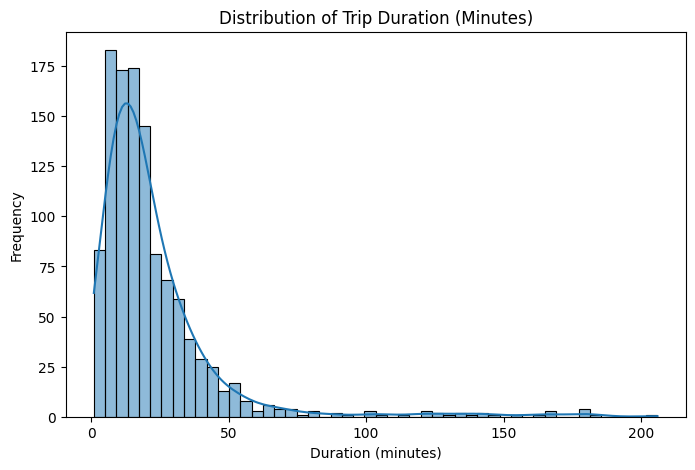

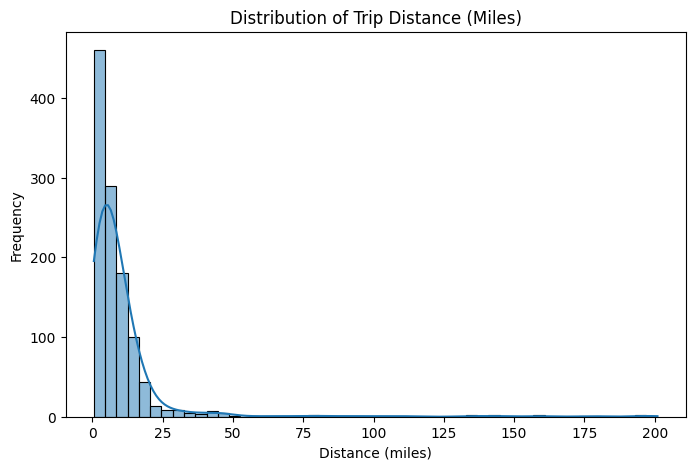

In [43]:
# - Distribution of trip durations -
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['TRIP_DURATION_MINUTES'], bins=50, kde=True)
plt.title('Distribution of Trip Duration (Minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# - Distribution of trip distances -
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['MILES'], bins=50, kde=True)
plt.title('Distribution of Trip Distance (Miles)')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()


## --- Save Cleaned Dataset ---
Save the processed file for the next steps (geocoding, weather enrichment).


In [44]:
# - Save to processed folder -
df_cleaned.to_csv(PROCESSED_DATA_PATH, index=False)
print(f">>> Cleaned dataset saved at {PROCESSED_DATA_PATH}")

>>> Cleaned dataset saved at ../data/processed/cleaned_uberdrives.csv


# -- Summary --

- Loaded Uber Drives raw dataset
- Performed EDA and identified missing values
- Cleaned data and removed invalid trips
- Calculated Trip Duration
- Saved cleaned dataset for further processing


# -- Next Steps: --
- Geocoding: Convert START locations to latitude and longitude
- Weather Enrichment: Fetch weather conditions using OpenWeatherMap API
- Feature Engineering for ML model

